# Modeling and Simulation in Python

Code for the orbit example


In [1]:
# Configure Jupyter so figures appear in the notebook
%matplotlib inline

# Configure Jupyter to display the assigned value after an assignment
%config InteractiveShell.ast_node_interactivity='last_expr_or_assign'

# import functions from the modsim.py module
from modsim import *

### Earth falling into the sun

Here's a question from the web site [Ask an Astronomer](http://curious.astro.cornell.edu/about-us/39-our-solar-system/the-earth/other-catastrophes/57-how-long-would-it-take-the-earth-to-fall-into-the-sun-intermediate):

"If the Earth suddenly stopped orbiting the Sun, I know eventually it would be pulled in by the Sun's gravity and hit it. How long would it take the Earth to hit the Sun? I imagine it would go slowly at first and then pick up speed."

Here's a solution.

In [2]:
# Here are the units we'll need

s = UNITS.second
N = UNITS.newton
kg = UNITS.kilogram
m = UNITS.meter

<Unit('meter')>

In [32]:
# And an inition condition (with everything in SI units)

r_0 = 147e9 * m
x = r_0
y = 0 * m
vx = 0 * m / s
vy= 30000 * m / s

init = State(x = x,
             y =y,
             vx = vx,
             vy = vy)

,values
x,147000000000.0 meter
y,0 meter
vx,0.0 meter / second
vy,30000.0 meter / second


In [50]:
# Making a system object

r_earth = 6.371e6 * m
r_sun = 695.508e6 * m

system = System(init=init,
                G=6.674e-11 * N / kg**2 * m**2,
                m1=1.989e30 * kg,
                r_final=r_sun + r_earth,
                t_0=0 * s,
                m2=5.972e24 * kg,
                t_end=31536000 * s)

,values
init,x 147000000000.0 meter y ...
G,6.674e-11 meter ** 2 * newton / kilogram ** 2
m1,1.989e+30 kilogram
r_final,701879000.0 meter
t_0,0 second
m2,5.972e+24 kilogram
t_end,31536000 second


In [51]:
# Here's a function that computes the force of gravity

def universal_gravitation(state, system):
    """Computes gravitational force.
    
    state: State object with distance r
    system: System object with m1, m2, and G
    """
    x, y, vx, vy = state
    unpack(system)
    
    force = G * m1 * m2 / r_0 **2
    return Vector(force * x / r_0, force * y / r_0)

In [52]:
universal_gravitation(init, system)

<Quantity([3.6686486e+22 0.0000000e+00], 'newton')>

In [53]:
# The slope function

def slope_func(state, t, system):
    """Compute derivatives of the state.
    
    state: position, velocity
    t: time
    system: System object containing `g`
    
    returns: derivatives of y and v
    """
    x, y, vx, vy = state
    unpack(system)    

    force = universal_gravitation(state, system)
    dydt = vy
    dxdt = vx
    dvxdt = -force.x / m2
    dvydt = -force.y / m2
    return dxdt, dydt, dvxdt, dvydt

In [54]:
# Always test the slope function!

slope_func(init, 0, system)

(<Quantity(0.0, 'meter / second')>,
 <Quantity(30000.0, 'meter / second')>,
 <Quantity(-0.006143082049146187, 'newton / kilogram')>,
 <Quantity(-0.0, 'newton / kilogram')>)

In [55]:
# Here's an event function that stops the simulation
# before the collision

def event_func(state, t, system):
    r, v = state
    return r - system.r_final

In [59]:
# Finally we can run the simulation

results, details = run_ode_solver(system, slope_func, max_step = 10000)
details

,values
sol,None
t_events,[]
nfev,18998
njev,0
nlu,0
status,0
message,The solver successfully reached the end of the...
success,True


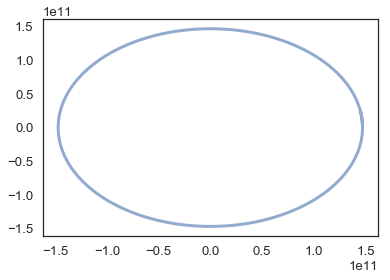

In [60]:
#plot of x and y as a function of time

results
plot(results.x, results.y)

In [15]:
# Scaling the time steps to days

results.index /= 60 * 60 * 24

In [16]:
# Scaling the distance to million km

r = results.r / 1e9;

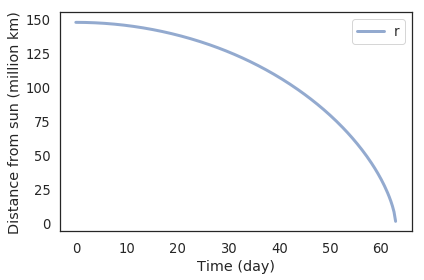

In [17]:
# And plotting

plot(r, label='r')

decorate(xlabel='Time (day)',
         ylabel='Distance from sun (million km)')